## Logistic Regression with WHO dataset

In this note, I review the concept of the logistic regression and demonstrate it with the WHO dataset.

### Review: Logistic regression

Logistic regression is a method to establish the relationship between the binary categorical dependent variable $Y$ (that is, $Y$ is either 0 or 1) and independent varaibles $X_1,\cdots,X_p$ with a generalized linear model. Since the dependent variable is categorical, logistic regression models are often used for classification problems. To be more specific on the logistic model, the probability of $Y$ being 1 is related to the independent variables as
$$\begin{eqnarray}
\text{Pr}(Y=1) =\text{Sigmoid}(\beta_0 + \beta_1 X_1 + \cdots \beta_p X_p ), \quad \text{Sigmoid}(x)=\frac{1}{1+e^{-x}}.
\end{eqnarray}$$

While the least squares method provided a closed form of regression coefficients for the linear regression, one cannot find the closed form of the coefficients for the logistic regression due to the sigmoid function. Therefore one must rely on some numerical optimization technique to find the regression coefficients.

### Demonstration with WHO dataset
Now I demonstrate the logistic regression with the WHO dataset. First, I load relevant libraries:

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as sf
import matplotlib.pyplot as plt
import seaborn as sns

Loading the WHO dataset. For simpler analysis, we only use three variables: life expectancy, adult mortality, and health expenditure. To utilize this dataset for the logistic regression, I turned the life expectancy into a binary categorical variable so that 'LE_over_70'=1 ('LE_over_70'=0) indicates that the life expectancy is more than (less than or equal to) 70 years. I present the sample dataset below.

In [2]:
df=pd.read_csv("dataset_WHO.csv")

df=df[
    (~pd.isna(df["life_expectancy"]))&
    (~pd.isna(df["adult_mortality"]))&
    (~pd.isna(df["health_expenditure"]))
]

df["LE_over_70"]=(df["life_expectancy"]>70)*1
df=df[["LE_over_70","adult_mortality","health_expenditure"]]

df.head()

,LE_over_70,adult_mortality,health_expenditure
0,0,245.22490,8.18227
1,0,237.96940,3.30698
2,1,96.40514,5.88311
3,1,73.95345,3.64399
4,1,111.42880,4.78592


For exploratory data analysis, I present the mean, the standard deviation, the minimum/maximum, and quartiles.

In [3]:
df.describe()

,LE_over_70,adult_mortality,health_expenditure
count,181.000000,181.000000,181.000000
mean,0.662983,162.664752,6.705698
std,0.474002,86.903047,2.630527
min,0.000000,49.201850,1.475300
25%,0.000000,95.825130,4.884310
50%,1.000000,147.168600,6.379290
75%,1.000000,219.298600,8.428770
max,1.000000,483.490600,17.140750


For further exploration of dataset, I present histograms of three variables. One can see that the adult mortality data is right-skewed, and the health expenditure data is bell-shaped.

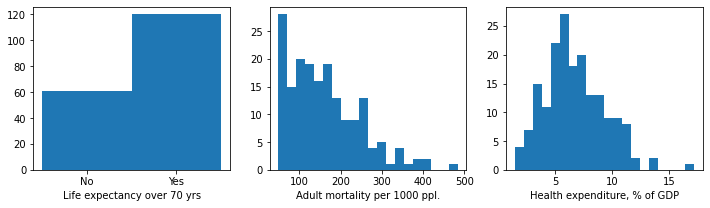

In [4]:
fig = plt.figure(figsize=[12,3])
plt.subplot(1,3,1)
plt.hist(df.LE_over_70,2)
plt.xlabel("Life expectancy over 70 yrs")
plt.xticks([0.25,0.75],["No","Yes"])
plt.subplot(1,3,2)
plt.hist(df.adult_mortality,20)
plt.xlabel("Adult mortality per 1000 ppl.")
plt.subplot(1,3,3)
plt.hist(df.health_expenditure,20)
plt.xlabel("Health expenditure, % of GDP");

To explore the relationship between variables, here I present scatter plots for each pair of different variables. Note that, in the last scatter plot, different categories of the life expectancy variable are marked with different colors.

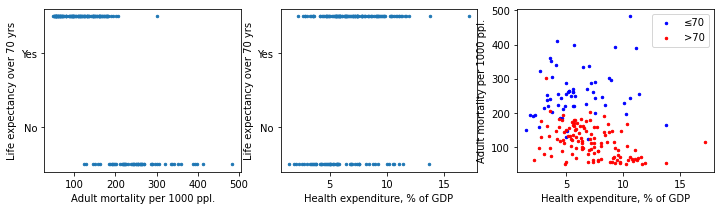

In [5]:
fig = plt.figure(figsize=[12,3])
plt.subplot(1,3,1)
plt.scatter(df.adult_mortality,df.LE_over_70,s=6)
plt.xlabel("Adult mortality per 1000 ppl.")
plt.ylabel("Life expectancy over 70 yrs")
plt.yticks([0.25,0.75],["No","Yes"])
plt.subplot(1,3,2)
plt.scatter(df.health_expenditure,df.LE_over_70,s=6)
plt.xlabel("Health expenditure, % of GDP")
plt.ylabel("Life expectancy over 70 yrs")
plt.yticks([0.25,0.75],["No","Yes"])
plt.subplot(1,3,3)
df_0=df[df["LE_over_70"]==0]
df_1=df[df["LE_over_70"]==1]
plt.scatter(df_0.health_expenditure,df_0.adult_mortality,c="b",s=6)
plt.scatter(df_1.health_expenditure,df_1.adult_mortality,c="r",s=6)
plt.xlabel("Health expenditure, % of GDP")
plt.ylabel("Adult mortality per 1000 ppl.")
plt.legend(["≤70",">70"]);

### Logistic regression and decision boundary
Logistic model only evaluates the probability of $Y$ being 1, so one needs to set the threshold for this probability to use the logistic model for a classification problem. The boundary presenting that threshold is called decision boundary. Here I fit the data into logsitic model composed of single or multiple features and present the descision boundary in the scatter plot.

Here I fit the logistic model between the life expectancy and adult mortality.

In [6]:
result=sf.logit("LE_over_70 ~ adult_mortality",df).fit(disp=0)

# setting the threshold p=0.5. Decision boundary calculated.
p=0.5
a_AM=(np.log(p/(1-p))-result.params["Intercept"])/result.params["adult_mortality"]
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             LE_over_70   No. Observations:                  181
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.6448
Time:                        20:43:14   Log-Likelihood:                -41.083
converged:                       True   LL-Null:                       -115.67
Covariance Type:            nonrobust   LLR p-value:                 2.639e-34
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.3284      1.469      6.352      0.000       6.450      12.207
adult_mortality    -0.0489      0.008     -6.134      0.000      -0.065      -0.033


Here I fit the logistic model between the life expectancy and health expenditure.

In [7]:
result=sf.logit("LE_over_70 ~ health_expenditure",df).fit(disp=0)

# setting the threshold p=0.5. Decision boundary calculated.
p=0.5
a_HE=(np.log(p/(1-p))-result.params["Intercept"])/result.params["health_expenditure"]
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             LE_over_70   No. Observations:                  181
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                 0.04324
Time:                        20:43:14   Log-Likelihood:                -110.66
converged:                       True   LL-Null:                       -115.67
Covariance Type:            nonrobust   LLR p-value:                  0.001563
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.6486      0.457     -1.420      0.156      -1.544       0.247
health_expenditure     0.2049      0.068      2.991      0.003       0.071       0.339


Here I fit the logistic model for the life expectancy with both of the adult mortality and the health expenditure.

In [8]:
result=sf.logit("LE_over_70 ~ health_expenditure + adult_mortality",df).fit(disp=0)
p=0.5
a0=(np.log(p/(1-p))-result.params["Intercept"])/result.params["adult_mortality"]
a1=-result.params["health_expenditure"]/result.params["adult_mortality"]
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             LE_over_70   No. Observations:                  181
Model:                          Logit   Df Residuals:                      178
Method:                           MLE   Df Model:                            2
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.6472
Time:                        20:43:14   Log-Likelihood:                -40.802
converged:                       True   LL-Null:                       -115.67
Covariance Type:            nonrobust   LLR p-value:                 3.069e-33
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.7051      1.650      5.277      0.000       5.472      11.938
health_expenditure     0.0937      0.126      0.742      0.458      -0.154       0.341
adult_mortality     

Logistic models with single feature are presented with the scatter plot. The red lines present the probabilities of the life expectancy being over 70 years, while the light red shadows present the range of that probability considering the deviation of the model. Black solid lines represent the one-dimensional decision boundaries.

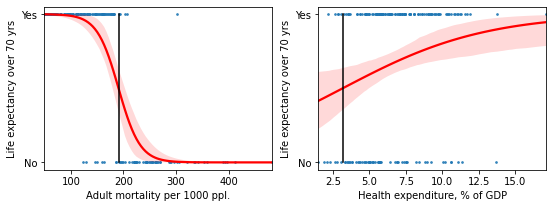

In [9]:
fig = plt.figure(figsize=[9,3])
plt.subplot(1,2,1)
sns.regplot(x="adult_mortality",y="LE_over_70",data=df,logistic=True,scatter_kws={"s":3},line_kws={"color":"r"})
plt.plot([a_AM,a_AM],[0,1],color="k")
plt.xlabel("Adult mortality per 1000 ppl.")
plt.ylabel("Life expectancy over 70 yrs")
plt.yticks([0,1],["No","Yes"])
plt.subplot(1,2,2)
sns.regplot(x="health_expenditure",y="LE_over_70",data=df,logistic=True,scatter_kws={"s":3},line_kws={"color":"r"})
plt.plot([a_HE,a_HE],[0,1],color="k")
plt.xlabel("Health expenditure, % of GDP")
plt.ylabel("Life expectancy over 70 yrs")
plt.yticks([0,1],["No","Yes"]);

Here I present the decision boundary for the logistic model with two features. Actual data are presented in scatter plot while different color presents different category. Light colored shadow regions indicate the decisions made by the logistic model.

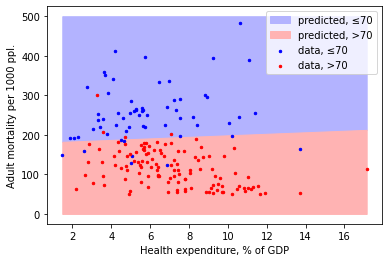

In [10]:
x=np.linspace(df["health_expenditure"].min(),df["health_expenditure"].max(),500)
y=a1*x+a0

plt.fill_between(x,y,0*y+500,color=[0.7,0.7,1])
plt.fill_between(x,0*y,y,color=[1,0.7,0.7])

plt.scatter(df_0.health_expenditure,df_0.adult_mortality,c="b",s=6)
plt.scatter(df_1.health_expenditure,df_1.adult_mortality,c="r",s=6)
plt.xlabel("Health expenditure, % of GDP")
plt.ylabel("Adult mortality per 1000 ppl.")
plt.legend(["predicted, ≤70","predicted, >70","data, ≤70","data, >70"]);